In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings

warnings.filterwarnings("ignore") 

np.random.seed(42)

### Simulating Data

In [3]:
n = np.array([150,200,300])
p = 2
Sigma_ind = np.array([[1,0],
                      [0,1]])
Sigma_cor = np.array([[1,0.95],
                       [0.95,1]])

x1_ind = np.random.multivariate_normal([-1,-1],Sigma_ind,n[0])
x2_ind = np.random.multivariate_normal([4,-3],Sigma_ind,n[1])
x3_ind = np.random.multivariate_normal([2,-3],Sigma_ind,n[2])

x1_cor = np.random.multivariate_normal([-1,-1],Sigma_cor,n[0])
x2_cor = np.random.multivariate_normal([4,-3],Sigma_cor,n[1])
x3_cor = np.random.multivariate_normal([2,-3],Sigma_cor,n[2])

x_ind = pd.DataFrame(np.concatenate((x1_ind, x2_ind, x3_ind), axis=0), columns=["X1", "X2"])
x_cor = pd.DataFrame(np.concatenate((x1_cor, x2_cor, x3_cor), axis=0), columns=["X1", "X2"])

x_ind['class'] = np.concatenate((np.repeat(1,n[0]), np.repeat(2,n[1]), np.repeat(3,n[2])))
x_cor['class'] = np.concatenate((np.repeat(1,n[0]), np.repeat(2,n[1]), np.repeat(3,n[2])))

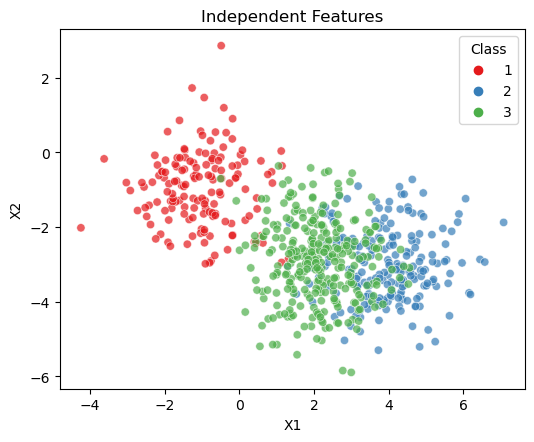

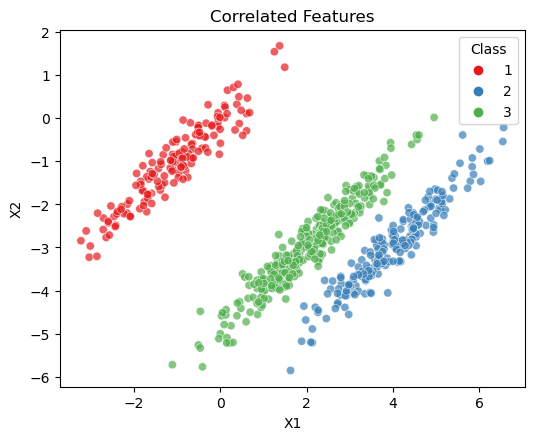

In [4]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=x_ind, x="X1", y="X2", hue="class", palette="Set1", alpha=0.7)
plt.title("Independent Features")
plt.gca().set_aspect('equal')  # Equivalent to coord_fixed(ratio = 1)
plt.legend(title="Class")
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(data=x_cor, x="X1", y="X2", hue="class", palette="Set1", alpha=0.7)
plt.title("Correlated Features")
plt.gca().set_aspect('equal')  # Equivalent to coord_fixed(ratio = 1)
plt.legend(title="Class")
plt.show()

### Naive Bayes

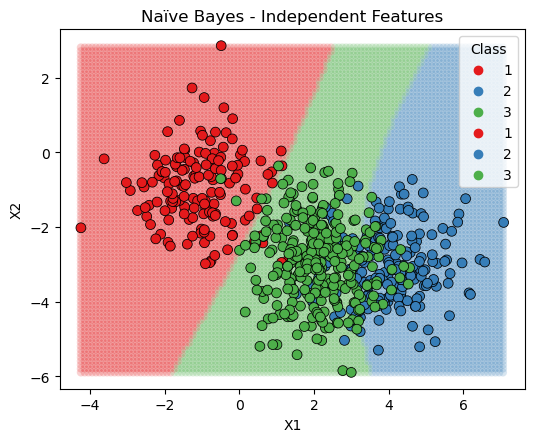

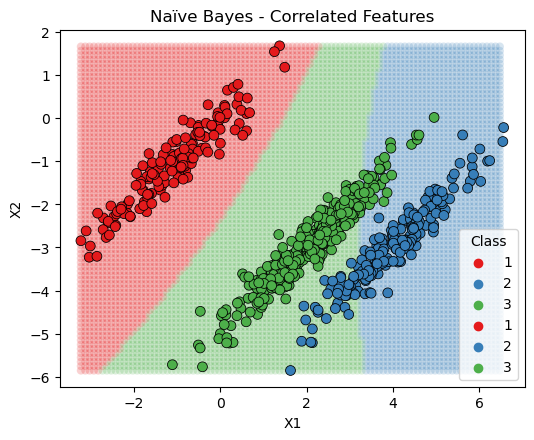

In [5]:
# Independent data first
# Fit the model
#note that GaussianNB defaults to different variances per class
nb_fit_ind = GaussianNB(var_smoothing=0)
nb_fit_ind.fit(x_ind[["X1", "X2"]], x_ind["class"])

# To visualize regions, we create a grid on which we evaluate our classifier
x1_ind_seq = np.arange(x_ind['X1'].min(), x_ind['X1'].max(), 0.1)
x2_ind_seq = np.arange(x_ind['X2'].min(), x_ind['X2'].max(), 0.1)
x1_ind_grid, x2_ind_grid = np.meshgrid(x1_ind_seq, x2_ind_seq)
x_ind_grid = pd.DataFrame({'X1': x1_ind_grid.ravel(), 'X2': x2_ind_grid.ravel()})

# Predict class labels for grid points
x_ind_grid['pred_class'] = nb_fit_ind.predict(x_ind_grid[['X1', 'X2']])

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=x_ind_grid, x="X1", y="X2", hue="pred_class", palette="Set1", alpha=0.2)
sns.scatterplot(data=x_ind, x="X1", y="X2", hue="class", palette="Set1", edgecolor="black", s=50)
plt.title("Naïve Bayes - Independent Features")
plt.legend(title="Class")
plt.gca().set_aspect('equal')  # Equivalent to coord_fixed in ggplot
plt.show()

#Doing the same for the correlated data
nb_fit_cor = GaussianNB()
nb_fit_cor.fit(x_cor[["X1", "X2"]], x_cor["class"])

x1_cor_seq = np.arange(x_cor['X1'].min(), x_cor['X1'].max(), 0.1)
x2_cor_seq = np.arange(x_cor['X2'].min(), x_cor['X2'].max(), 0.1)
x1_cor_grid, x2_cor_grid = np.meshgrid(x1_cor_seq, x2_cor_seq)
x_cor_grid = pd.DataFrame({'X1': x1_cor_grid.ravel(), 'X2': x2_cor_grid.ravel()})

x_cor_grid['pred_class'] = nb_fit_cor.predict(x_cor_grid[['X1', 'X2']])

plt.figure(figsize=(6, 6))
sns.scatterplot(data=x_cor_grid, x="X1", y="X2", hue="pred_class", palette="Set1", alpha=0.2)
sns.scatterplot(data=x_cor, x="X1", y="X2", hue="class", palette="Set1", edgecolor="black", s=50)
plt.title("Naïve Bayes - Correlated Features")
plt.legend(title="Class")
plt.gca().set_aspect('equal')  # Equivalent to coord_fixed in ggplot
plt.show()

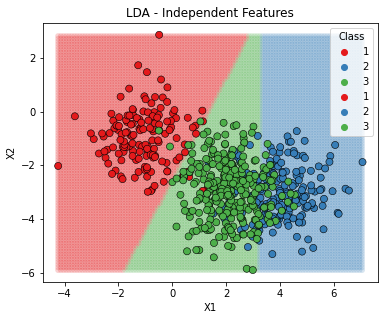

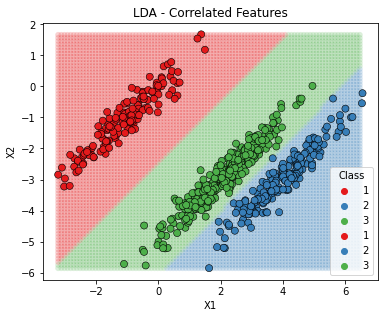

In [5]:
lda_fit_ind = LinearDiscriminantAnalysis()
lda_fit_ind.fit(x_ind[['X1', 'X2']], x_ind['class'])

x1_seq = np.arange(x_ind['X1'].min(), x_ind['X1'].max(), 0.1)
x2_seq = np.arange(x_ind['X2'].min(), x_ind['X2'].max(), 0.1)
x1_grid, x2_grid = np.meshgrid(x1_seq, x2_seq)
x_grid = pd.DataFrame({'X1': x1_grid.ravel(), 'X2': x2_grid.ravel()})

x_grid['pred_class'] = lda_fit_ind.predict(x_grid[['X1', 'X2']])

plt.figure(figsize=(6, 6))
sns.scatterplot(data=x_grid, x="X1", y="X2", hue="pred_class", palette="Set1", alpha=0.2)
sns.scatterplot(data=x_ind, x="X1", y="X2", hue="class", palette="Set1", edgecolor="black", s=50)
plt.title("LDA - Independent Features")
plt.legend(title="Class")
plt.gca().set_aspect('equal')  # Equivalent to coord_fixed in ggplot
plt.show()

lda_fit_cor = LinearDiscriminantAnalysis()
lda_fit_cor.fit(x_cor[['X1', 'X2']], x_cor['class'])

x1_seq = np.arange(x_cor['X1'].min(), x_cor['X1'].max(), 0.1)
x2_seq = np.arange(x_cor['X2'].min(), x_cor['X2'].max(), 0.1)
x1_grid, x2_grid = np.meshgrid(x1_seq, x2_seq)
x_grid = pd.DataFrame({'X1': x1_grid.ravel(), 'X2': x2_grid.ravel()})

x_grid['pred_class'] = lda_fit_cor.predict(x_grid[['X1', 'X2']])

plt.figure(figsize=(6, 6))
sns.scatterplot(data=x_grid, x="X1", y="X2", hue="pred_class", palette="Set1", alpha=0.2)
sns.scatterplot(data=x_cor, x="X1", y="X2", hue="class", palette="Set1", edgecolor="black", s=50)
plt.title("LDA - Correlated Features")
plt.legend(title="Class")
plt.gca().set_aspect('equal')  # Equivalent to coord_fixed in ggplot
plt.show()

In [6]:
# Compute error for Naïve Bayes with independent features
nb_ind_preds = nb_fit_ind.predict(x_ind[['X1', 'X2']])
nb_ind_error = np.mean(nb_ind_preds != x_ind['class'])

# Compute error for Naïve Bayes with correlated features
nb_cor_preds = nb_fit_cor.predict(x_cor[['X1', 'X2']])
nb_cor_error = np.mean(nb_cor_preds != x_cor['class'])

# Compute error for LDA with independent features
lda_ind_preds = lda_fit_ind.predict(x_ind[['X1', 'X2']])
lda_ind_error = np.mean(lda_ind_preds != x_ind['class'])

# Compute error for LDA with correlated features
lda_cor_preds = lda_fit_cor.predict(x_cor[['X1', 'X2']])
lda_cor_error = np.mean(lda_cor_preds != x_cor['class'])

# Store results in a pandas DataFrame
errors = pd.DataFrame({
    "Method": ["Naive Bayes", "LDA", "Naive Bayes", "LDA"],
    "Features": ["Independent", "Independent", "Correlated", "Correlated"],
    "Error": [nb_ind_error, lda_ind_error, nb_cor_error, lda_cor_error]
})

# Print results
print(errors)

        Method     Features     Error
0  Naive Bayes  Independent  0.146154
1          LDA  Independent  0.136923
2  Naive Bayes   Correlated  0.121538
3          LDA   Correlated  0.000000


In [78]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="class")
wine = pd.concat([X, y], axis=1)

In [21]:
# from ucimlrepo import fetch_ucirepo 

# # fetch dataset 
# wine = fetch_ucirepo(id=109) 

In [79]:
# Fit LDA model
wine_lda = LinearDiscriminantAnalysis()

wine_lda.fit(X, y)

# Obtain LDA-transformed values (Fisher linear discriminants)
wine_lda_values = wine_lda.transform(X)

Prior probabilities of groups:
0: 0.3314607
1: 0.3988764
2: 0.2696629

Group means:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.74        2.01  2.46              17.04     106.34           2.84   
1    12.28        1.93  2.24              20.24      94.55           2.26   
2    13.15        3.33  2.44              21.42      99.31           1.68   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        2.98                  0.29             1.90             5.53  1.06   
1        2.08                  0.36             1.63             3.09  1.06   
2        0.78                  0.45             1.15             7.40  0.68   

   od280/od315_of_diluted_wines  proline  
0                          3.16  1115.71  
1                          2.79   519.51  
2                          1.68   629.90  

Coefficients of linear discriminants:
                               LD1   LD2
alcohol                       0.40  0.

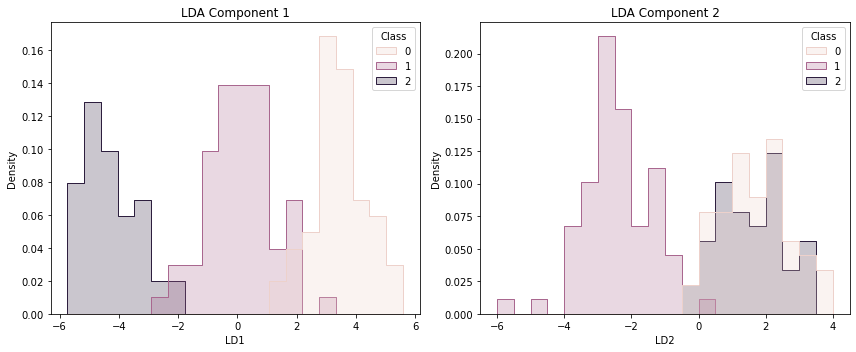

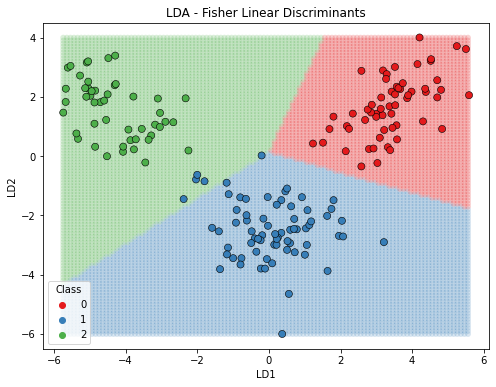

In [88]:
# Prior probabilities
class_counts = np.bincount(y.to_numpy())
prior_probs = class_counts / class_counts.sum()
print("Prior probabilities of groups:")
for label, prob in zip(np.unique(y), prior_probs):
    print(f"{label}: {prob:.7f}")
print()

# Group means
group_means = pd.DataFrame([list(wine[wine['class'] == i].drop('class', axis=1).mean()) for i in range(3)], columns=list(X.columns))
print("Group means:")
print(group_means.round(2))
print()

# Coefficients of linear discriminants
coef_df = pd.DataFrame(wine_lda.scalings_, index=X.columns, columns=[f"LD{i+1}" for i in range(wine_lda.scalings_.shape[1])])
print("Coefficients of linear discriminants:")
print(coef_df.round(2))
print()

# Proportion of trace (Explained Variance Ratio)
prop_trace = wine_lda.explained_variance_ratio_
prop_trace_df = pd.Series(prop_trace, index=[f"LD{i+1}" for i in range(len(prop_trace))])
print("Proportion of trace:")
print(prop_trace_df.round(4).to_string(index=True))

# Convert to DataFrame for plotting
lda_df = pd.DataFrame({
    'LD1': wine_lda_values[:, 0].flatten(),  # Ensure 1D array
    'LD2': wine_lda_values[:, 1].flatten(),  # Ensure 1D array
    'Class': y.values.flatten()  # Convert y to 1D if needed
})

# Plot histograms of first two LDA components
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i in range(2):  # First two LDA components
    sns.histplot(data=lda_df, x=f'LD{i+1}', hue="Class", bins=20, ax=axes[i], element="step", stat="density")
    axes[i].set_title(f'LDA Component {i+1}')

plt.tight_layout()
plt.show()

# Create grid for decision boundary visualization
x1_seq = np.arange(wine_lda_values[:, 0].min(), wine_lda_values[:, 0].max(), 0.1)
x2_seq = np.arange(wine_lda_values[:, 1].min(), wine_lda_values[:, 1].max(), 0.1)
x1_grid, x2_grid = np.meshgrid(x1_seq, x2_seq)

# Flatten grid points and create DataFrame
x_grid = pd.DataFrame({'LD1': x1_grid.ravel(), 'LD2': x2_grid.ravel()})

# Transform grid back into original feature space using the LDA model's coefficients
X_mean = wine_lda.xbar_  # Mean of the original features
X_transformed = np.dot(x_grid[['LD1', 'LD2']], wine_lda.scalings_[:, :2].T) + X_mean

# Predict class for each transformed grid point
x_grid['Class'] = wine_lda.predict(X_transformed)

# Plot decision regions and original data
plt.figure(figsize=(8, 6))

# Decision boundary (background points)
sns.scatterplot(data=x_grid, x="LD1", y="LD2", hue="Class", alpha=0.2, palette="Set1", legend=False)

# Original data points (foreground)
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="Class", edgecolor="black", s=50, palette="Set1")

plt.title("LDA - Fisher Linear Discriminants")
plt.legend(title="Class")
plt.show()